# Use of `shrecc`

This notebook guides you through the various steps needed to create spatially- and regionally-specific consumption electricity mixes. These mixes are written directly in a dedicated `brightway` database, ready to be used in your own LCA project.

In [3]:
import os
import sys

# Get the directory of the notebook
notebook_dir = os.getcwd()

# Assuming the SHRECC directory is the parent of the current directory
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir))

# Add the project root to the Python path
sys.path.append(project_root)

In [4]:
import bw2data as bd
import bw2io as bi
import pandas as pd

from shrecc.download import get_data, download_shrecc_data
from shrecc.treatment import data_processing
from shrecc.database import create_database, filt_cutoff

%load_ext line_profiler
%load_ext autoreload
%autoreload 2

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare your data

Do this in case you want to download data for any other year than the default year in the `shrecc_data` [repository](https://git.list.lu/shrecc_project/shrecc_data), or if you simply want to recalculate it on your own.

First, run function get_data(). This will download all the electricity data for all countries for a selected year.

In [3]:
print("Project root:", project_root)
print("Notebook directory:", notebook_dir)

Project root: c:\Users\liang\OneDrive - Luxembourg Institute of Science and Technology\LIST\SUSTAIN\IMMEC\SHRECC\shrecc
Notebook directory: c:\Users\liang\OneDrive - Luxembourg Institute of Science and Technology\LIST\SUSTAIN\IMMEC\SHRECC\shrecc\notebooks


In [9]:
data = get_data(year=2022,
                root=project_root)
#if no root given, the function wil$l try to find SHRECC package in your installed environment

al
Bad request! Country not found.
Error: Expecting value: line 1 column 1 (char 0), retrying 1/3...
Bad request! Country not found.
Error: Expecting value: line 1 column 1 (char 0), retrying 2/3...
Bad request! Country not found.
Error: Expecting value: line 1 column 1 (char 0), retrying 3/3...
Failed to fetch data for al.
am
Bad request! Country not found.
Error: Expecting value: line 1 column 1 (char 0), retrying 1/3...
Bad request! Country not found.
Error: Expecting value: line 1 column 1 (char 0), retrying 2/3...
Bad request! Country not found.
Error: Expecting value: line 1 column 1 (char 0), retrying 3/3...
Failed to fetch data for am.
at
https://api.energy-charts.info/public_power?country=at&start=1640991600&end=1672527540
...production for at OK.
https://api.energy-charts.info/cbpf?country=at&start=1640991600&end=1672527540
...trade for at OK.
az
Bad request! Country not found.
Error: Expecting value: line 1 column 1 (char 0), retrying 1/3...
Bad request! Country not found.
E

Next, it's time to treat the data. This part is very heavy due to matrix inversion, and is recommended to run on a server.

In [10]:
data_processing(data_df=data,
                year=2022,
                root=project_root)
#if no root given, the function will try to find SHRECC package in your installed environment


Processing data...


c:\Users\liang\OneDrive - Luxembourg Institute of Science and Technology\LIST\SUSTAIN\IMMEC\SHRECC\shrecc\shrecc\treatment.py:49: PerformanceWarning: indexing past lexsort depth may impact performance.
  if col in data_df.T.index
c:\Users\liang\OneDrive - Luxembourg Institute of Science and Technology\LIST\SUSTAIN\IMMEC\SHRECC\shrecc\shrecc\treatment.py:49: PerformanceWarning: indexing past lexsort depth may impact performance.
  if col in data_df.T.index


saving pickles
pickles saved
treating data
Calculating consumption losses
month 12/2021


c:\Users\liang\.conda\envs\shrecc_clean\lib\site-packages\pypardiso\pardiso_wrapper.py:245: SparseEfficiencyWarning: PyPardiso requires the right-hand side b to be a dense array for maximum efficiency
  warnings.warn('PyPardiso requires the right-hand side b to be a dense array for maximum efficiency',
c:\Users\liang\.conda\envs\shrecc_clean\lib\site-packages\pypardiso\pardiso_wrapper.py:258: PyPardisoWarning: Array b's data type was converted from float32 to float64
  warnings.warn("Array b's data type was converted from {} to float64".format(str(b.dtype)),


month 1/2022
month 2/2022
month 3/2022
month 4/2022
month 5/2022
month 6/2022
month 7/2022
month 8/2022
month 9/2022
month 10/2022
month 11/2022
month 12/2022
Calculating consumption losses finished
Applying load losses
Load losses applied and saved
Results light computation started
Results light computation finished
..all done!


And that's literally it! Now it's time to select which countries and times you are interested in and create your database.

## Get your project ready
In order to run following functions, you need to have a `brightway` (2 or 2.5) project with biosphere and ecoinvent installed. Matching of electricity sources is valid for ecoinvent 3.9.1, but should be compatible with 3.10 and 3.11. You also need to have a `pandas` dataframe with all the electricity data. Either you created it on your own with the above steps, or you downloaded it from [our git](https://git.list.lu/shrecc_project/shrecc_data).

In [4]:
bd.projects.set_current('SHRECCbw25')

In [5]:
bd.databases

Databases dictionary with 4 object(s):
	ecoinvent-3.9.1-biosphere
	ecoinvent-3.9.1-cutoff
	elec_february_2022_evening
	elec_june_2022_noon

In [15]:
if 'ecoinvent-3.9.1-cutoff' not in bd.databases:

    bi.import_ecoinvent_release(
        version="3.9.1",
        system_model="cutoff",
        username=os.environ["ECOINVENT_LOG"],
        password=os.environ["ECOINVENT_PASS"],
    )

c:\Users\liang\.conda\envs\shrecc_clean\lib\site-packages\ecoinvent_interface\release.py:238: UserWarning: Can't automatically delete C:\Users\liang\AppData\Local\pylca\EcoinventInterface\cache\ecoinvent 3.9.1_cutoff_ecoSpold02.7z
        Please delete manually
  warnings.warn(message)


Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.01 seconds
Graph statistics for `ecoinvent-3.9.1-biosphere` importer:
4718 graph nodes:
	emission: 4250
	natural resource: 450
	inventory indicator: 13
	economic: 5
0 graph edges:
0 edges to the following databases:
0 unique unlinked edges (0 total):




100%|██████████| 4718/4718 [00:00<00:00, 20231.72it/s]


09:35:58+0200 [info     ] Vacuuming database            
Created database: ecoinvent-3.9.1-biosphere
Extracting XML data from 21238 datasets
09:36:49+0200 [info     ] Extracted 21238 datasets in 50.00 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remov

100%|██████████| 21238/21238 [00:51<00:00, 416.33it/s]


09:37:48+0200 [info     ] Vacuuming database            
Created database: ecoinvent-3.9.1-cutoff


c:\Users\liang\.conda\envs\shrecc_clean\lib\site-packages\ecoinvent_interface\release.py:238: UserWarning: Can't automatically delete C:\Users\liang\AppData\Local\pylca\EcoinventInterface\cache\ecoinvent 3.9.1_LCIA_implementation.7z
        Please delete manually
  warnings.warn(message)


To download already-calculated data, you can visit the SHRECC data git repository: https://git.list.lu/shrecc_project/shrecc_data

### Example 1: all days in June around noon
In this example, we model the consumption mix of five countries, around noon on all days in June.


In [6]:
countries = ["FI", "SE", "LU", "AT", "FR"]

In [7]:
example = filt_cutoff(
    countries=countries,
    general_range=["2022-06-01 01:00:00",
                   "2022-06-30 23:00:00"],
    refined_range=[10, 14],
    freq="h",
    cutoff=1e-3,
    include_cutoff=True,
    root="..",
)

Mapping technologies...


c:\Users\liang\OneDrive - Luxembourg Institute of Science and Technology\LIST\SUSTAIN\IMMEC\SHRECC\shrecc\shrecc\database.py:202: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  LCI_cons.loc[load_difference_row].fillna(0, inplace=True)


Technologies mapped.
Filtering dataframe...
Dataframe filtered.


#### To create a database based on our filtered and cut off dataframe with selected days/times

In [8]:
example.head()

country                                                                                                       AT  \
geography_source activityName                                       product                   unitName             
AT               electricity production, deep geothermal            electricity, high voltage kWh       0.000000   
                 electricity production, hard coal                  electricity, high voltage kWh       0.000000   
                 electricity production, hydro, pumped storage      electricity, high voltage kWh       0.030967   
                 electricity production, hydro, reservoir, alpin... electricity, high voltage kWh       0.068467   
                 electricity production, hydro, run-of-river        electricity, high voltage kWh       0.444558   

country                                                                                                  FI  \
geography_source activityName                                       product                   unitName        
AT               electricity production, deep geothermal            electricity, high voltage kWh       0.0   
                 electricity production, hard coal                  electricity, high voltage kWh       0.0   
                 electricity production, hydro, pumped storage      electricity, high voltage kWh       0.0   
                 electricity production, hydro, reservoir, alpin... electricity, high voltage kWh       0.0   
                 electricity production, hydro, run-of-river        electricity, high voltage kWh       0.0   

country                                                                                                  FR  \
geography_source activityName                                       product                   unitName        
AT               electricity production, deep geothermal            electricity, high voltage kWh       0.0   
                 electricity production, hard coal                  electricity, high voltage kWh       0.0   
                 electricity production, hydro, pumped storage      electricity, high voltage kWh       0.0   
                 electricity production, hydro, reservoir, alpin... electricity, high voltage kWh       0.0   
                 electricity production, hydro, run-of-river        electricity, high voltage kWh       0.0   

country                                                                                                  LU  \
geography_source activityName                                       product                   unitName        
AT               electricity production, deep geothermal            electricity, high voltage kWh       0.0   
                 electricity production, hard coal                  electricity, high voltage kWh       0.0   
                 electricity production, hydro, pumped storage      electricity, high voltage kWh       0.0   
                 electricity production, hydro, reservoir, alpin... electricity, high voltage kWh       0.0   
                 electricity production, hydro, run-of-river        electricity, high voltage kWh       0.0   

country                                                                                                  SE  
geography_source activityName                                       product                   unitName       
AT               electricity production, deep geothermal            electricity, high voltage kWh       0.0  
                 electricity production, hard coal                  electricity, high voltage kWh       0.0  
                 electricity production, hydro, pumped storage      electricity, high voltage kWh       0.0  
                 electricity production, hydro, reservoir, alpin... electricity, high voltage kWh       0.0  
                 electricity production, hydro, run-of-river        electricity, high voltage kWh       0.0

In [10]:
create_database(dataframe_filt = example,
                project_name   = "SHRECCbw25",
                db_name        = "elec_june_2022_noon",
                eidb_name      = "ecoinvent-3.9.1-cutoff")

100%|██████████| 5/5 [00:00<00:00, 357.25it/s]


13:40:11+0200 [info     ] Vacuuming database            


### Example 2: all days on February evenings
Another example of dataframe, this time on February evenings

In [11]:
example2 = filt_cutoff(
    countries=countries,
    general_range=["2022-02-01 01:00:00", "2022-02-28 23:00:00"], 
    refined_range=[19, 23],
    freq="h",
    cutoff=1e-3,
    include_cutoff=True,
    root="..",
)

Mapping technologies...


c:\Users\liang\OneDrive - Luxembourg Institute of Science and Technology\LIST\SUSTAIN\IMMEC\SHRECC\shrecc\shrecc\database.py:202: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  LCI_cons.loc[load_difference_row].fillna(0, inplace=True)


Technologies mapped.
Filtering dataframe...
Dataframe filtered.


In [13]:
create_database(dataframe_filt = example2,
                project_name   = "SHRECCbw25",
                db_name        = "elec_february_2022_evening",
                eidb_name      = "ecoinvent-3.9.1-cutoff")

100%|██████████| 5/5 [00:00<00:00, 344.35it/s]


13:46:27+0200 [info     ] Vacuuming database            


# Test
We run an LCA for the 4 mix samples, as well as their ecoinvent 3.9.1 equivalents.

In [16]:
import bw2calc as bc

In [21]:
ef_methods = [m for m in bd.methods if m[1] == 'EF v3.0']
config = {"impact_categories" : ef_methods}

In [24]:
demands_summer_noon    = {f"{a['name']}, summer, noon":{a['id']:1} for a in bd.Database('elec_june_2022_noon')}
demands_winter_evening = {f"{a['name']}, winter, evening":{a['id']:1} for a in bd.Database('elec_february_2022_evening')}
demands = {**demands_summer_noon, **demands_winter_evening}

In [26]:
acts_ei = [bd.get_node(database='ecoinvent-3.9.1-cutoff',
                       location=country,
                       name='market for electricity, low voltage') for country in sorted(countries)]
acts_ei

['market for electricity, low voltage' (kilowatt hour, AT, None),
 'market for electricity, low voltage' (kilowatt hour, FI, None),
 'market for electricity, low voltage' (kilowatt hour, FR, None),
 'market for electricity, low voltage' (kilowatt hour, LU, None),
 'market for electricity, low voltage' (kilowatt hour, SE, None)]

In [27]:
demands.update({f"{a['name']}, {a['location']}":{a['id']:1} for a in acts_ei})
demands

{'Electricity mix in FI, summer, noon': {185718795730677760: 1},
 'Electricity mix in FR, summer, noon': {185718795781009408: 1},
 'Electricity mix in SE, summer, noon': {185718795781009410: 1},
 'Electricity mix in LU, summer, noon': {185718795781009409: 1},
 'Electricity mix in AT, summer, noon': {185718795726483456: 1},
 'Electricity mix in AT, winter, evening': {185720372013035520: 1},
 'Electricity mix in FR, winter, evening': {185720372013035522: 1},
 'Electricity mix in SE, winter, evening': {185720372071755777: 1},
 'Electricity mix in LU, winter, evening': {185720372071755776: 1},
 'Electricity mix in FI, winter, evening': {185720372013035521: 1},
 'market for electricity, low voltage, AT': {185295374903406596: 1},
 'market for electricity, low voltage, FI': {185295384508362755: 1},
 'market for electricity, low voltage, FR': {185295328828977153: 1},
 'market for electricity, low voltage, LU': {185295397024165888: 1},
 'market for electricity, low voltage, SE': {18529528151303

In [28]:
data_objs = bd.get_multilca_data_objs(functional_units=demands,
                                      method_config=config)

In [29]:
m_lca = bc.MultiLCA(demands=demands,
                    method_config=config,
                    data_objs=data_objs)

In [30]:
m_lca.lci()

In [31]:
m_lca.lcia()

In [ ]:
results = []
for (method, fu), score in m_lca.scores.items():    
    demand = m_lca.demands[fu]
    a_id = list(demand).pop()
    a = bd.get_activity(a_id)    
    # prod_e = list(a.production()).pop()    
    results.append(
            {
                "activity": a['name'],
                "database": a['database'],
                "location": a['location'],
                "production amount": demand[a_id],
                "activity unit": a["unit"],
                "reference product": a["reference product"],
                "methodology": method[0],
                "category": method[1],
                "indicator": method[2],
                "score": score,
                "unit": bd.Method(method).metadata["unit"],
            },
        )
res_df = pd.DataFrame(results)
res_df = res_df.set_index([c for c in res_df.columns if c != 'score']).unstack(['category','indicator','unit'])


In [37]:
res_df.sort_index(level='location', inplace=True)

Text(0, 0.5, 'kg CO2 eq./kWh')

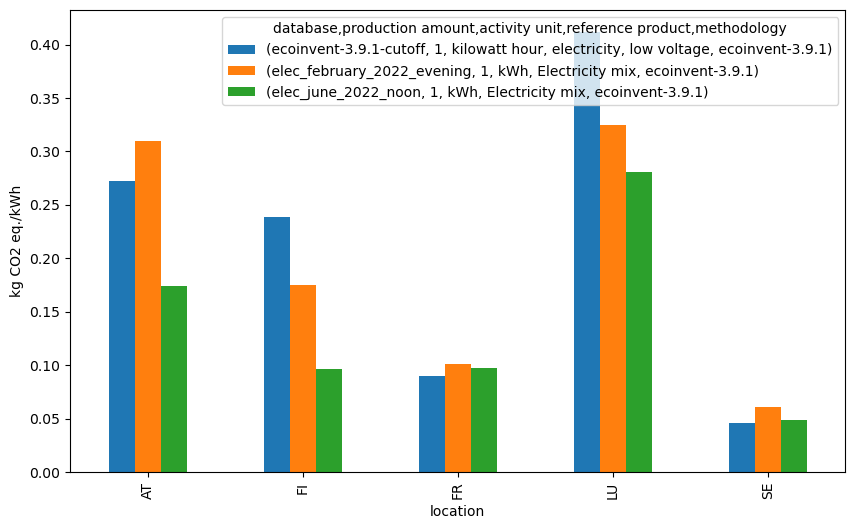

In [ ]:
ax = res_df[('score','EF v3.0', 'climate change', 'kg CO2-Eq')].droplevel(['activity']).unstack(['location']).T.plot.bar(figsize=(10,6))
ax.set_ylabel('kg CO2 eq./kWh')

# Further analysis and comparisons

In [52]:
m_lca.lci()

In [53]:
m_lca.invert_technosphere_matrix()

array([[1.00000007e+00, 2.10898076e-07, 5.78067973e-04, ...,
        7.64899494e-08, 1.19637873e-07, 7.66504114e-08],
       [9.95539745e-08, 1.00235815e+00, 1.17694839e-03, ...,
        1.08684591e-07, 1.91717983e-07, 1.11581212e-07],
       [2.91994390e-08, 2.67197021e-08, 1.00002729e+00, ...,
        7.98013066e-08, 1.15056242e-07, 8.32458449e-08],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [54]:
m_lca.demands

{'Electricity mix in FI, summer, noon': {185718795730677760: 1},
 'Electricity mix in FR, summer, noon': {185718795781009408: 1},
 'Electricity mix in SE, summer, noon': {185718795781009410: 1},
 'Electricity mix in LU, summer, noon': {185718795781009409: 1},
 'Electricity mix in AT, summer, noon': {185718795726483456: 1},
 'Electricity mix in AT, winter, evening': {185720372013035520: 1},
 'Electricity mix in FR, winter, evening': {185720372013035522: 1},
 'Electricity mix in SE, winter, evening': {185720372071755777: 1},
 'Electricity mix in LU, winter, evening': {185720372071755776: 1},
 'Electricity mix in FI, winter, evening': {185720372013035521: 1},
 'market for electricity, low voltage, AT': {185295374903406596: 1},
 'market for electricity, low voltage, FI': {185295384508362755: 1},
 'market for electricity, low voltage, FR': {185295328828977153: 1},
 'market for electricity, low voltage, LU': {185295397024165888: 1},
 'market for electricity, low voltage, SE': {18529528151303

In [55]:
matrix_indices = [{k:m_lca.activity_dict[vk] for vk in v.keys()} for k,v in m_lca.demands.items()]
matrix_indices

[{'Electricity mix in FI, summer, noon': 21239},
 {'Electricity mix in FR, summer, noon': 21240},
 {'Electricity mix in SE, summer, noon': 21242},
 {'Electricity mix in LU, summer, noon': 21241},
 {'Electricity mix in AT, summer, noon': 21238},
 {'Electricity mix in AT, winter, evening': 21243},
 {'Electricity mix in FR, winter, evening': 21245},
 {'Electricity mix in SE, winter, evening': 21247},
 {'Electricity mix in LU, winter, evening': 21246},
 {'Electricity mix in FI, winter, evening': 21244},
 {'market for electricity, low voltage, AT': 17543},
 {'market for electricity, low voltage, FI': 17950},
 {'market for electricity, low voltage, FR': 13769},
 {'market for electricity, low voltage, LU': 19405},
 {'market for electricity, low voltage, SE': 9008}]

In [56]:
m_lca.inverted_technosphere_matrix.shape

(21248, 21248)

In [57]:
demands_inverted = {k:m_lca.inverted_technosphere_matrix[:,v] for d in matrix_indices for k,v in d.items()}

In [58]:
reversed_activity_dict = {v:k for k,v in m_lca.activity_dict.items()}

In [59]:
matrix_index = [bd.get_activity(reversed_activity_dict[i]) for i in range(m_lca.inverted_technosphere_matrix.shape[0])]

In [60]:
properties = ['name', 'unit', 'code', 'location', 'reference product', 'type', 'database', 'id']
df_index = pd.MultiIndex.from_tuples([[m[prop] for prop in properties] for m in matrix_index], names=properties)

In [61]:
demands_inverted_df = pd.DataFrame(demands_inverted, index=df_index)

In [62]:
process_contribution = demands_inverted_df.sort_values(by=demands_inverted_df.columns[0], ascending=False)

In [63]:
idx_elec = process_contribution.index.get_level_values('name').str.startswith('electricity production')

In [64]:
process_contribution_elec = process_contribution.loc[idx_elec].sort_index(axis=1).droplevel(['unit','code','reference product','type','database','id'])
process_contribution_elec

,,"Electricity mix in AT, summer, noon","Electricity mix in AT, winter, evening","Electricity mix in FI, summer, noon","Electricity mix in FI, winter, evening","Electricity mix in FR, summer, noon","Electricity mix in FR, winter, evening","Electricity mix in LU, summer, noon","Electricity mix in LU, winter, evening","Electricity mix in SE, summer, noon","Electricity mix in SE, winter, evening","market for electricity, low voltage, AT","market for electricity, low voltage, FI","market for electricity, low voltage, FR","market for electricity, low voltage, LU","market for electricity, low voltage, SE"
name,location,,,,,,,,,,,,,,,
"electricity production, hydro, run-of-river",FI,0.000071,0.000052,0.210964,0.133127,0.000078,0.000045,0.000084,0.000063,0.000026,0.000018,0.000018,0.113419,0.000008,0.000026,0.000052
"electricity production, nuclear, boiling water reactor",FI,0.000118,0.000087,0.190397,0.187805,0.000129,0.000074,0.000140,0.000104,0.000043,0.000030,0.000030,0.187980,0.000014,0.000043,0.000086
"electricity production, hydro, reservoir, non-alpine region",SE,0.000114,0.000086,0.115817,0.074814,0.000123,0.000071,0.001367,0.002416,0.464035,0.392023,0.000098,0.017319,0.000018,0.000265,0.086184
"electricity production, nuclear, pressure water reactor",FI,0.000067,0.000049,0.107321,0.105859,0.000073,0.000042,0.000079,0.000059,0.000024,0.000017,0.000017,0.105958,0.000008,0.000024,0.000048
"electricity production, nuclear, boiling water reactor",SE,0.000385,0.000290,0.053698,0.039905,0.000412,0.000238,0.000455,0.001645,0.215703,0.207299,0.000329,0.058525,0.000059,0.000894,0.291241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"electricity production, wind, >3MW turbine, onshore",CN-HE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"electricity production, natural gas, conventional power plant",CN-HU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted",CA-YK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
country = 'LU'
threshold = 0.05



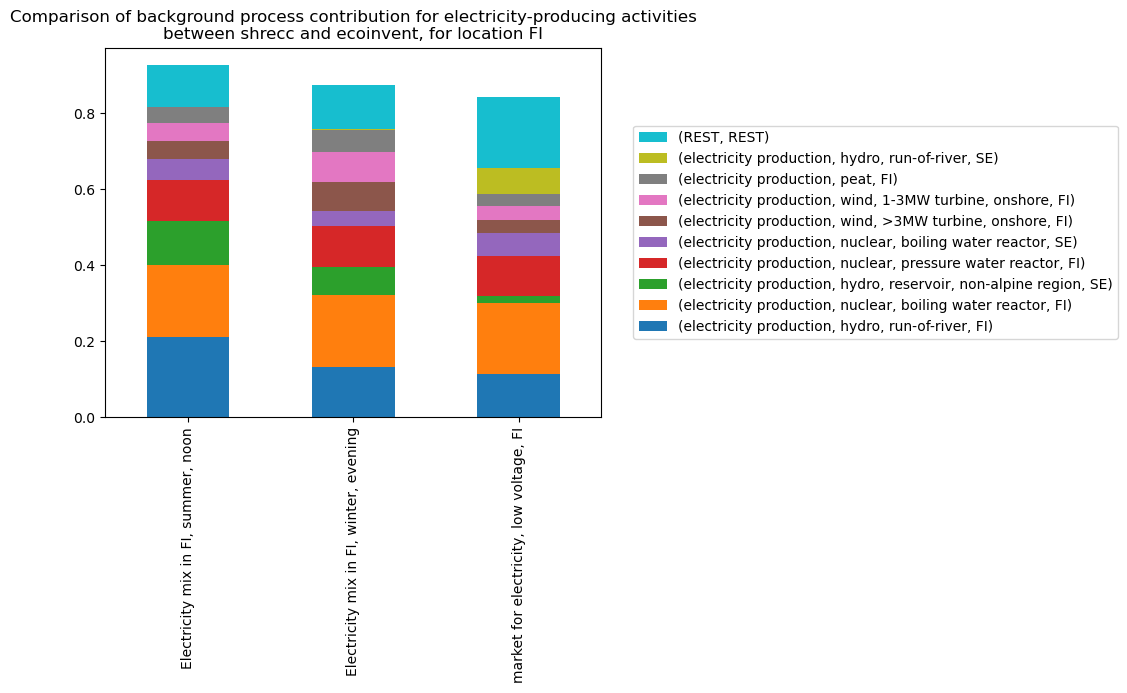

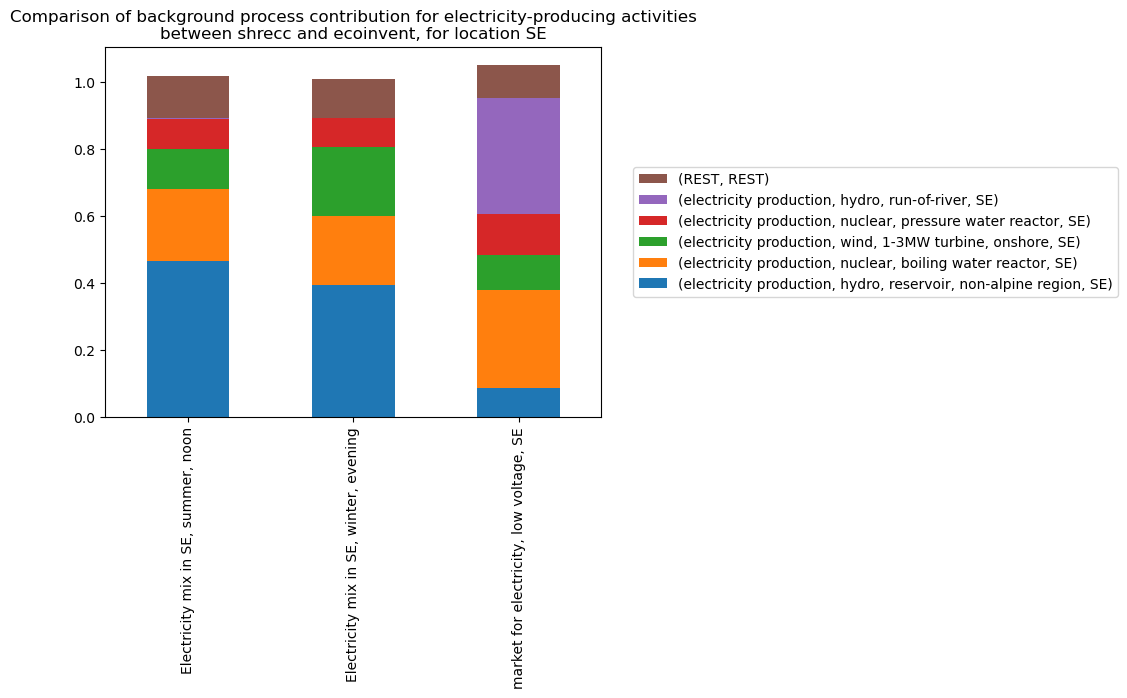

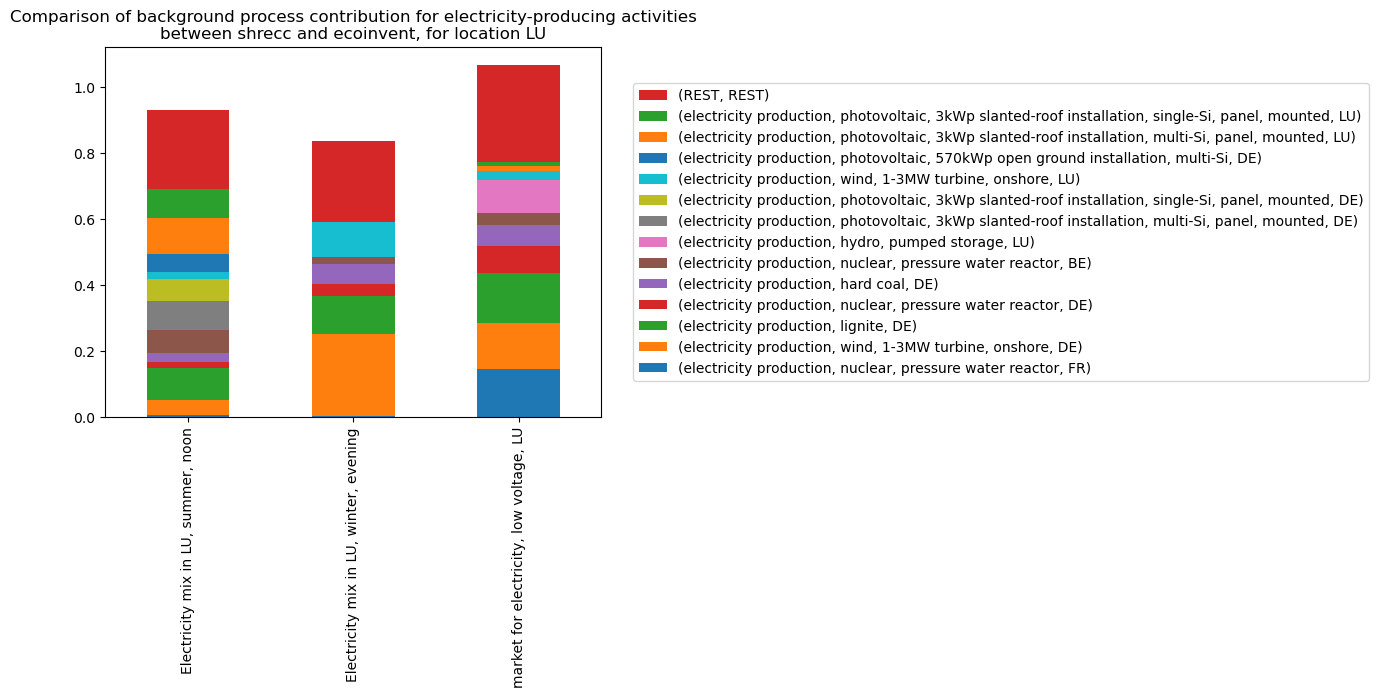

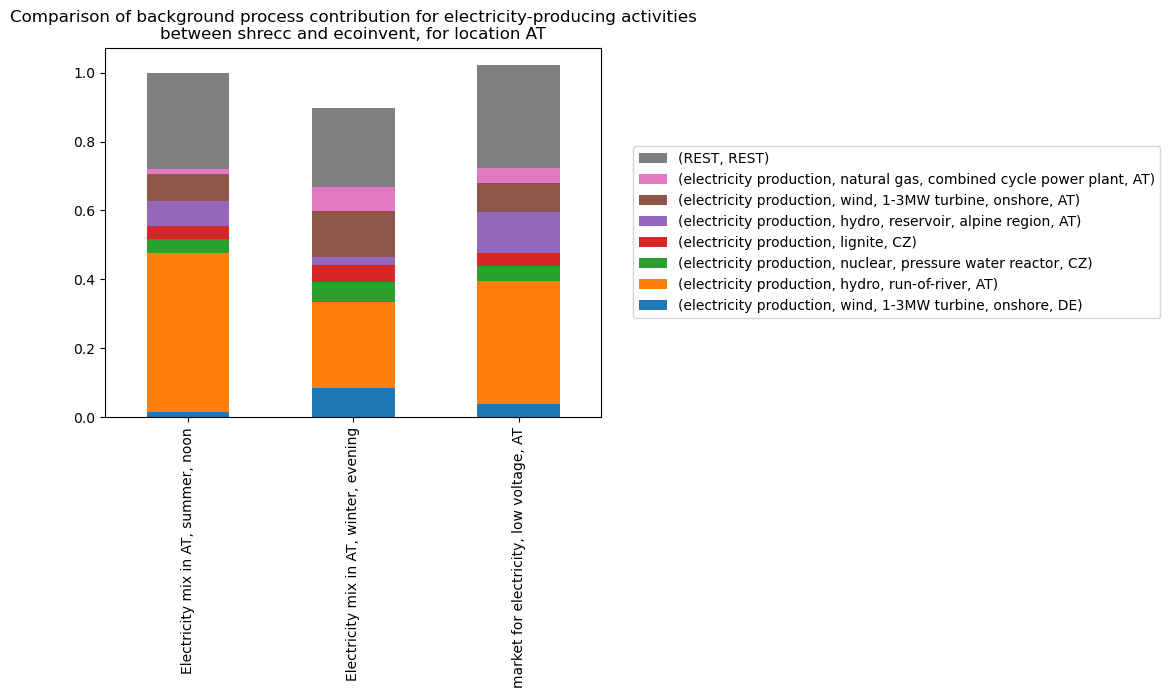

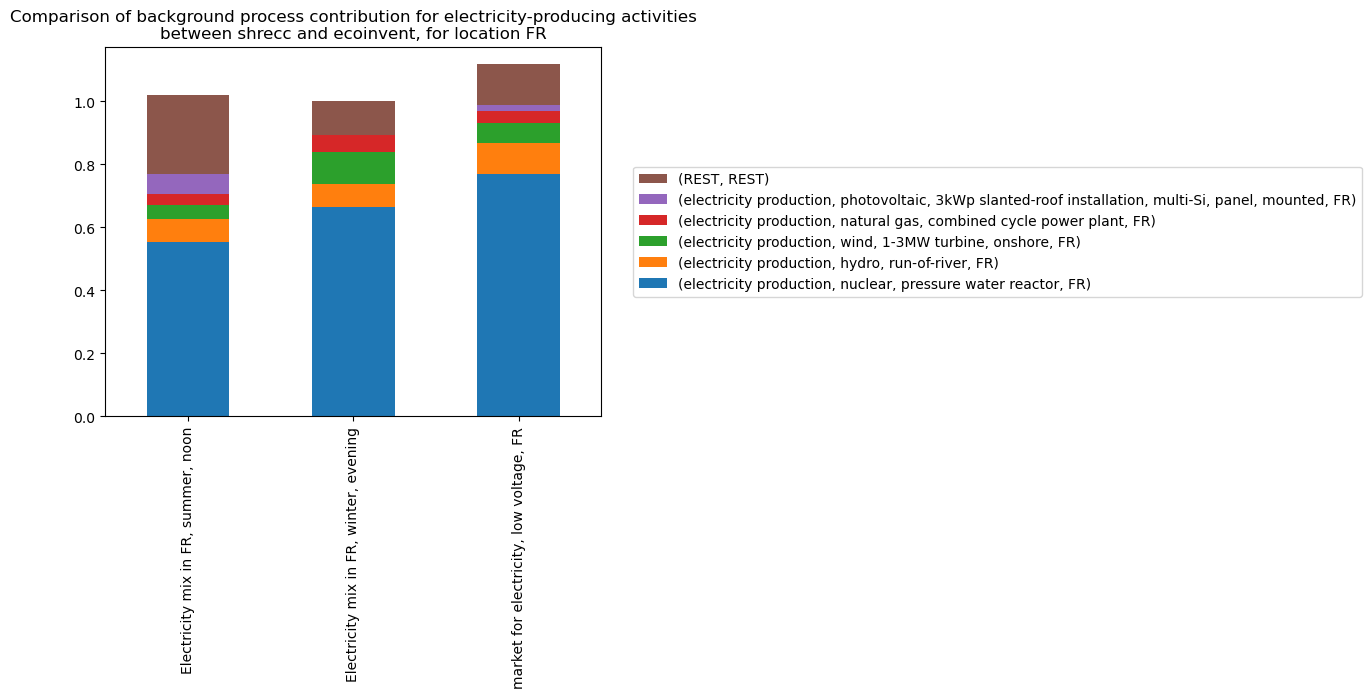

In [66]:
for country in countries:
    process_contribution_elec_c = process_contribution_elec[[c for c in process_contribution_elec if country in c]]

    idx_filt = (process_contribution_elec_c >= threshold).any(axis=1)
    mix_to_plot = pd.concat([process_contribution_elec_c.loc[idx_filt],
            pd.DataFrame(process_contribution_elec_c[~idx_filt].sum(), columns=[('REST', 'REST')]).T],
            axis=0).T#.droplevel(['code','unit'], axis=0)

    ax = mix_to_plot.plot.bar(stacked=True)
    h,l = ax.get_legend_handles_labels()
    ax.legend(loc='center left', bbox_to_anchor=(1.05,0.5), handles=h[::-1], labels=l[::-1])
    ax.set_title(f'Comparison of background process contribution for electricity-producing activities\nbetween shrecc and ecoinvent, for location {country}')


Some remarks about the mix analysis.

1. From the comparison of background processes in Sweden, you can see that the electricity mix done by shrecc contains some aggregated data for hydro electricity. On the Energy Chart API, there is no distinction between the types, and so all hydro (run-off-river, reservoir, hydro pumped storage) is together in one category. Ecoinvent has the different types in the mix.
2. Not all background processes sum to one; we performed our search based on "electricity production", and there might be some activities with a different name, still contributing to the electricity mix.